In [5]:
import pandas as pd
import numpy as np
import string as s
import seaborn as sns
import math
from collections import defaultdict
# import tables
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style, colors
from itertools import groupby
import matplotlib.patches as patches
from matplotlib import gridspec
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list
from scipy.spatial.distance import pdist
from scipy.ndimage.interpolation import shift
# matplotlib.style.use('ggplot')
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
from matplotlib.colors import rgb2hex, colorConverter
# matplotlib.rcParams['figure.facecolor'] = 'white'
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll
matplotlib.style.use('ggplot')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/chipseq/'

In [90]:
f1 = '{}categorisation_of_epigentic_modifiers_from_Alessia_v3.xls'.format(wkdir)
df1 = pd.read_excel(f1, index_col='patient', sheetname='sample_mut_details_sz')
df1.head(2)
df1.shape

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,HIV status,ARID1A,ATRX,BAZ1A,BAZ1B,BAZ2B,BRD2,BRD3,BRD4,BRD7,...,TBL1X,TFPT,TRIM33,UBE2B,TRRAP,WHSC1L1,YEATS2,YY1,ZMYND11,ZMYND8
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02007,HIV negative,1,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
HTMCP-03-06-02026,HIV negative,1,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


(54, 117)

In [91]:
df1 = df1.drop('HIV status', axis=1)

df1.head()

df1 = df1.loc[:,df1.sum()>3]

# sort df
df1 = df1.T

df1['count']  = df1.sum(axis=1)

df1 = df1.sort_values('count', ascending=False).drop('count', axis=1)

df1 = df1.sort_values(df1.index.tolist(), axis=1, ascending=False).fillna(0)

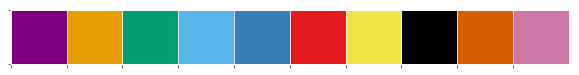

In [61]:
sns.palplot(sns.color_palette(clrs))

[0.0, 1.0]


Text(0.5,1,'')

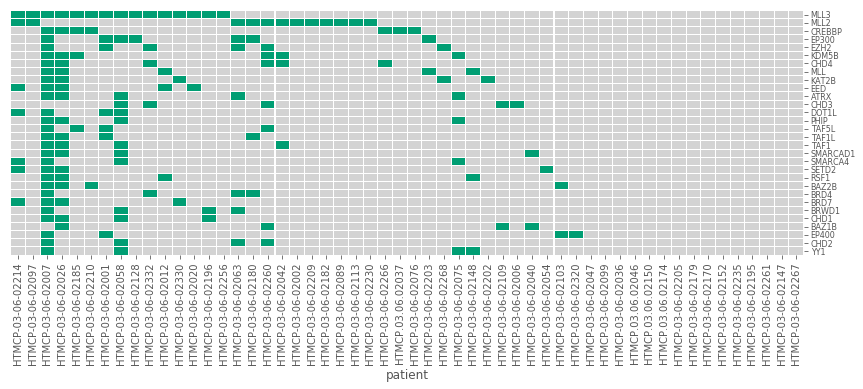

In [99]:
# def plot_oncoprint(df):
#     df = df[col_den_labels]
df = df1
nrows = df.shape[0]    
fig = plt.figure(figsize=(15,.15*nrows), facecolor='white')
gs = gridspec.GridSpec(1, 2,                            
                       width_ratios=[1,18], 
#                        height_ratios=[1]*nrows,
                       wspace=0.0, # horizontal space
                       hspace=0.0  # vertical space
                      )
grid_num = 0
# categories = sorted(df.loc['ARID1A',:].unique())
categories = [0.0, 1.0]
print(categories)
clrs = [ "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]
 # make map dictionary
# map_dict = {k:v for v, k in  enumerate(categories)} 
# clrs = clrs[:len(map_dict)]    
# types = len(map_dict)
cmap = colors.ListedColormap(["lightgray","#009E73"])
# print(map_dict)
# dfa = pd.DataFrame(index=[ix], columns=df.columns)
# dfa.loc[ix,:] = df.loc[ix,].map(map_dict).astype(float)

# # add covariate track legend
gs1 = gs[grid_num+1]
ax1 = plt.subplot(gs1, facecolor='white')
ax1.set_title("")  
sns.heatmap(df, 
            ax=ax1, 
            cmap=cmap,
            linewidths=.05,                    
            xticklabels=True,
            yticklabels=True,
            cbar=False) #cbar_ax=ax1,
_ = ax1.tick_params(axis='y', which='major', labelsize=8)
_ = ax1.set_yticklabels(ax1.yaxis.get_majorticklabels(), rotation=0)
_ = ax1.yaxis.tick_right()

# gs0 = gs[grid_num]
# ax0 =  plt.subplot(gs0, frameon=False)

# k = 0
# for key, clr in zip(map_dict.keys(), clrs):

#     rect = patches.Rectangle((0,k/types), 0.2, 1/types, 
#                              linewidth=0.001,
#                              edgecolor=clr,
#                              facecolor=clr)

#     _ = ax0.text(0.25, k/types+0.05, 
#                  key, 
#                  ha='left', 
#                  va='center', 
#                  fontsize=6)
#     _ = ax0.add_patch(rect)
#     k+=1
# _ = ax0.get_xaxis().set_ticks([])
# _ = ax0.get_yaxis().set_ticks([])
# _ = ax0.set_title('')
# grid_num+=2
plt.show()
